# HW03 – Simple Regression with Real Estate Data
### By Donovan Manogue


## Section 3 Import Libraries

In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [565]:
#importing required libraries for homework

## Section 4 Import Data

In [568]:
df_realestate= pd.read_csv('data/Real Estate Data - Week 3.csv', index_col=0, header=0)

In [570]:
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Alley,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,NaN,Level,College Creek,Normal,7,5,2003,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,NaN,Level,Veenker,Adjacent Feeder St,6,8,1976,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500
3,2-STORY 1946 & NEWER,68.0,11250,NaN,Level,College Creek,Normal,7,5,2001,...,Rough Finished,2,0,42,0,0,0,0,Normal Sale,223500
4,2-STORY 1945 & OLDER,60.0,9550,NaN,Level,Crawford,Normal,7,5,1915,...,Unfinished,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000
5,2-STORY 1946 & NEWER,84.0,14260,NaN,Level,Northridge,Normal,8,5,2000,...,Rough Finished,3,192,84,0,0,0,0,Normal Sale,250000


In [572]:
#Imported the data and read the data using the head function

## Section 5 Simple Linear Regression

### Section 5a Create the X and Y datasets and simple regression

In [576]:
X=df_realestate['Living Area Above Grade']
y=df_realestate['Sale Price']
X=sm.add_constant(X)

reg= sm.OLS(y, X).fit()

pred=reg.predict(X)

resid=reg.resid
                 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1199.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          7.76e-190
Time:                        23:18:53   Log-Likelihood:                -17076.
No. Observations:                1390   AIC:                         3.416e+04
Df Residuals:                    1388   BIC:                         3.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.369e+04   4485.277      7.511      0.000    2.49e+04    4.25e+04
Living Area Above Grade    96.9264      2.800     34.620      0.000      91.434     102.419
==============================================================================
Omnibus:                      180.493   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1755.914
Skew:                           0.193   Prob(JB):                         0.00
Kurtosis:                       8.493   Cond. No.                     5.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [578]:
#Created a Simple Linear regression and created the resideual and predicted amount

### Section 5b Create a regression Table

In [581]:
df_reg = df_realestate[['Living Area Above Grade','Sale Price']]
df_reg.reset_index()

,Id,Living Area Above Grade,Sale Price
0,1,1710,208500
1,2,1262,181500
2,3,1786,223500
3,4,1717,140000
4,5,2198,250000
...,...,...,...
1385,1456,1647,175000
1386,1457,2073,210000
1387,1458,2340,266500
1388,1459,1078,142125


In [583]:
df_reg = pd.concat([df_reg,pred,resid], axis=1)
df_reg.head(10)

,Living Area Above Grade,Sale Price,0,1
Id,,,,
1,1710,208500,199432.115140,9067.884860
2,1262,181500,156009.099394,25490.900606
3,1786,223500,206798.519597,16701.480403
4,1717,140000,200110.599761,-60110.599761
5,2198,250000,246732.185862,3267.814138
6,1362,143000,165701.736837,-22701.736837
7,1694,307000,197881.293149,109118.706851
8,2090,200000,236264.137424,-36264.137424
9,1774,129900,205635.403103,-75735.403103


In [585]:
df_reg=df_reg.rename(columns={0:'Sale Price Predicted', \
                              1:'Residual'})
df_reg

,Living Area Above Grade,Sale Price,Sale Price Predicted,Residual
Id,,,,
1,1710,208500,199432.115140,9067.884860
2,1262,181500,156009.099394,25490.900606
3,1786,223500,206798.519597,16701.480403
4,1717,140000,200110.599761,-60110.599761
5,2198,250000,246732.185862,3267.814138
...,...,...,...,...
1456,1647,175000,193325.753551,-18325.753551
1457,2073,210000,234616.389058,-24616.389058
1458,2340,266500,260495.731032,6004.268968


In [587]:
# Created a regression table with the prediction and residual, and renamed their columns

### Section 5c Create a regression plot (regplot)

Text(0, 0.5, 'Sale Price')

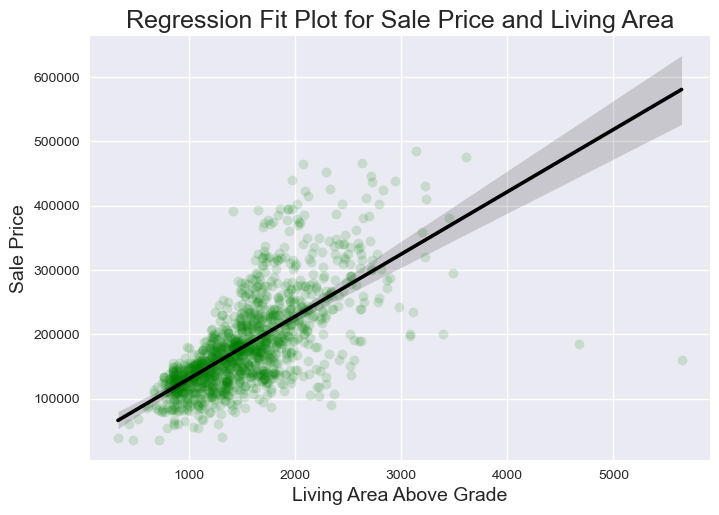

In [590]:
sns.regplot(x='Living Area Above Grade', y= 'Sale Price', data = df_reg, scatter_kws={'color':'green','alpha':0.15, 's':50},
            line_kws={'color':'black'})

plt.title('Regression Fit Plot for Sale Price and Living Area',fontsize ='18',multialignment='center')
plt.xlabel('Living Area Above Grade',fontsize='14',multialignment='center')
plt.ylabel('Sale Price', fontsize='14',multialignment='center')

In [591]:
# Created a regression plot using seaborns regplot

### Section 5d Create a Residual Plot (residplot)

Text(0, 0.5, 'Sale Price')

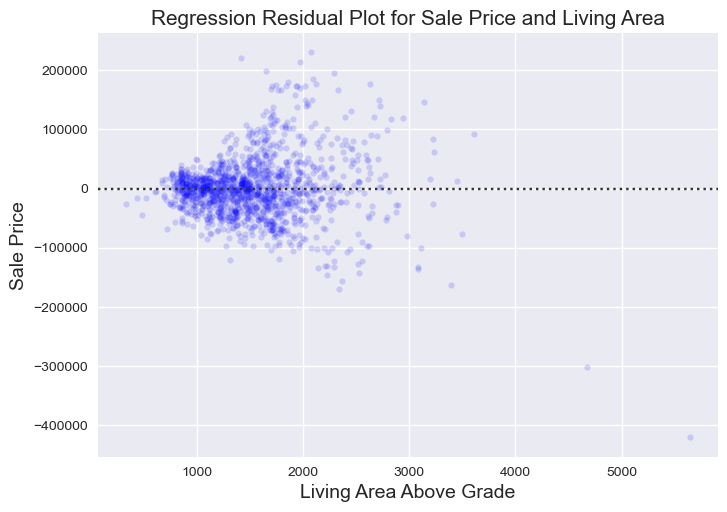

In [595]:
sns.residplot(x='Living Area Above Grade', y= 'Sale Price', data = df_reg, scatter_kws={'color':'blue','alpha':0.15, 's':20},
              line_kws={'color': 'black'})
plt.title('Regression Residual Plot for Sale Price and Living Area',fontsize ='15',multialignment='center')
plt.xlabel('Living Area Above Grade',fontsize='14',multialignment='center')
plt.ylabel('Sale Price', fontsize='14',multialignment='center')

In [596]:
# Created a Residual plot 

### Section 5e Create a Regresion Plot (Impot) Based on Garage Cars

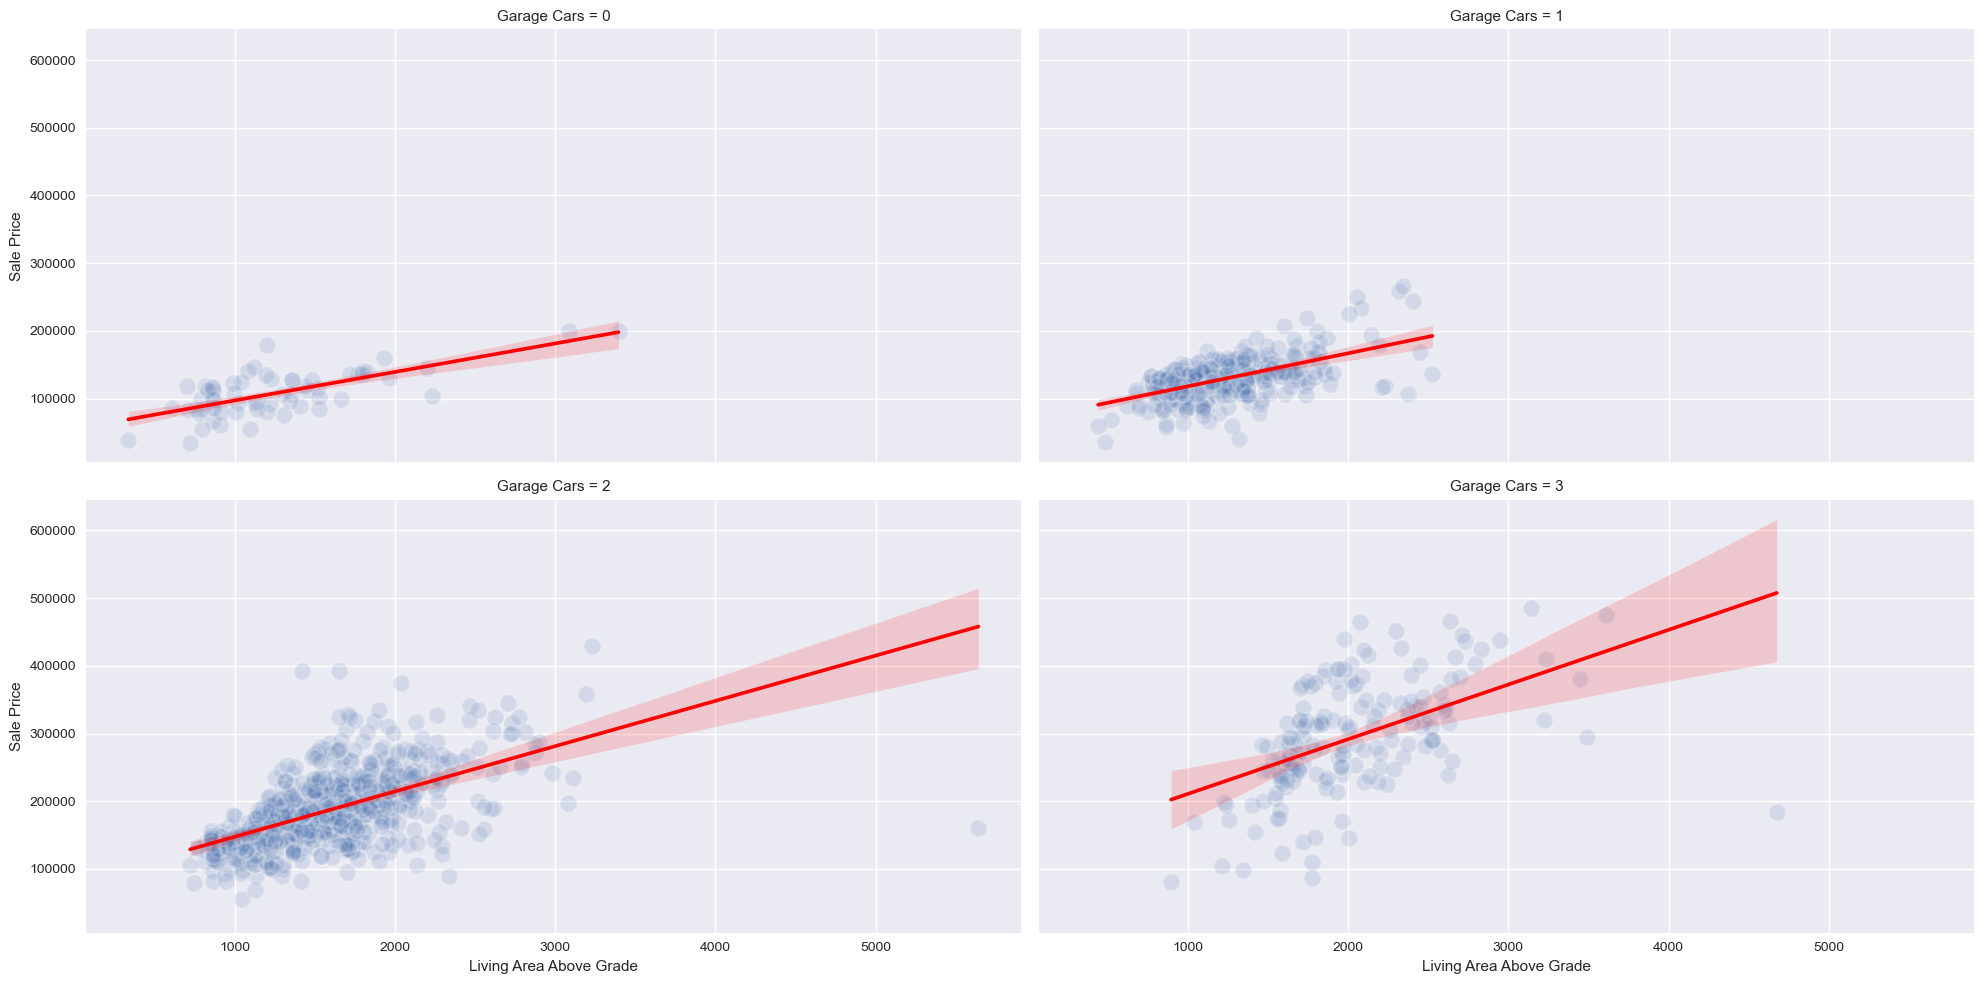

In [600]:
sns.lmplot(x='Living Area Above Grade', y='Sale Price', col ='Garage Cars', col_wrap=2, data=df_realestate, palette='Set1' ,aspect=2, scatter_kws={"alpha":0.15,"s":150,"linewidths":2,"edgecolor":"white"}
,line_kws={'color':'red'},)

In [601]:
# Created a lmplot plot 

In [602]:
reg.summary()
#independent is living area above grade

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1199.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          7.76e-190
Time:                        23:18:55   Log-Likelihood:                -17076.
No. Observations:                1390   AIC:                         3.416e+04
Df Residuals:                    1388   BIC:                         3.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.369e+04   4485.277      7.511      0.000    2.49e+04    4.25e+04
Living Area Above Grade    96.9264      2.800     34.620      0.000      91.434     102.419
==============================================================================
Omnibus:                      180.493   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1755.914
Skew:                           0.193   Prob(JB):                         0.00
Kurtosis:                       8.493   Cond. No.                     5.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Section 5f Explanation of Simple Regression Results

Explanation:
The relationship between Living Area above grade and Sale Price is a slight linear relationship.
When looking at the R-squared results it shows that almost half of all the variance in the target variable are predicted.

The plots show that there is a slight linear relatioship.

The Results:
R-Squared 0.463


Practical Implacation of the Results:
In more practical implications the results show that the Sale Price of a home in this data set can have a slight linear relationship when the Area Grade 
increases 46% of the time the sale price on the home also increases. When looking at this data there is a correlation between them, but the AIC and BIC are high
and depict there might be a better model to express this.

In [605]:
#explanation of the results found 

## Section 6 Mutliple Regression 

### Section 6a Create a Multiple regression for Sale Price with Living Area Above Grade and Garage Carrs

In [612]:
X=df_realestate[['Living Area Above Grade','Garage Cars']]
y=df_realestate['Sale Price']
X=sm.add_constant(X)

reg2= sm.OLS(y, X).fit()

pred2=reg2.predict(X)

resid2=reg2.resid
                 
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          5.79e-292
Time:                        23:18:55   Log-Likelihood:                -16837.
No. Observations:                1390   AIC:                         3.368e+04
Df Residuals:                    1387   BIC:                         3.370e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2366.5055   4067.359     -0.582      0.561   -1.03e+04    5612.334
Living Area Above Grade    68.6612      2.638     26.029      0.000      63.487      73.836
Garage Cars              4.436e+04   1857.324     23.885      0.000    4.07e+04     4.8e+04
==============================================================================
Omnibus:                      151.685   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1229.044
Skew:                           0.084   Prob(JB):                    1.31e-267
Kurtosis:                       7.604   Cond. No.                     5.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Creating a multiple regression with two independent variables

### Section 6b Create a Regression Table for Multiple Regression

In [615]:
df_reg2 = df_realestate[['Living Area Above Grade','Sale Price','Garage Cars']]
df_reg2.reset_index()

,Id,Living Area Above Grade,Sale Price,Garage Cars
0,1,1710,208500,2
1,2,1262,181500,2
2,3,1786,223500,2
3,4,1717,140000,3
4,5,2198,250000,3
...,...,...,...,...
1385,1456,1647,175000,2
1386,1457,2073,210000,2
1387,1458,2340,266500,1
1388,1459,1078,142125,1


In [617]:
df_reg2 = pd.concat([df_reg2,pred2,resid2], axis=1)
df_reg2.head(10)

,Living Area Above Grade,Sale Price,Garage Cars,0,1
Id,,,,,
1,1710,208500,2,203768.988587,4731.011413
2,1262,181500,2,173008.762367,8491.237633
3,1786,223500,2,208987.241249,14512.758751
4,1717,140000,3,248612.021697,-108612.021697
5,2198,250000,3,281638.068152,-31638.068152
6,1362,143000,2,179874.884291,-36874.884291
7,1694,307000,2,202670.409079,104329.590921
8,2090,200000,2,229860.251899,-29860.251899
9,1774,129900,2,208163.306619,-78263.306619


In [619]:

df_reg2=df_reg2.rename(columns={0:'Sale Price Predicted', \
                              1:'Residual'})
df_reg2.head(10)

,Living Area Above Grade,Sale Price,Garage Cars,Sale Price Predicted,Residual
Id,,,,,
1,1710,208500,2,203768.988587,4731.011413
2,1262,181500,2,173008.762367,8491.237633
3,1786,223500,2,208987.241249,14512.758751
4,1717,140000,3,248612.021697,-108612.021697
5,2198,250000,3,281638.068152,-31638.068152
6,1362,143000,2,179874.884291,-36874.884291
7,1694,307000,2,202670.409079,104329.590921
8,2090,200000,2,229860.251899,-29860.251899
9,1774,129900,2,208163.306619,-78263.306619


In [ ]:
# Renaming columns, and concatenating the predicted vlaue and the residual

### Section 6c Create a Regression Plot (regplot)

Text(0, 0.5, 'Sale Price')

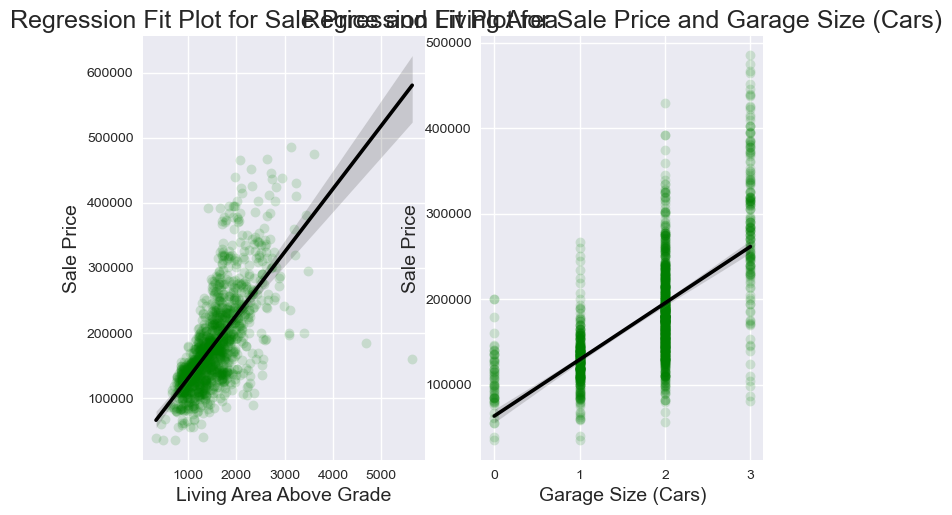

In [622]:
plt.subplot(121)

sns.regplot(x='Living Area Above Grade', y= 'Sale Price', data = df_reg2, scatter_kws={'color':'green','alpha':0.15, 's':50},
            line_kws={'color':'black'})

plt.title('Regression Fit Plot for Sale Price and Living Area',fontsize ='18',multialignment='center')
plt.xlabel('Living Area Above Grade',fontsize='14',multialignment='center')
plt.ylabel('Sale Price', fontsize='14',multialignment='center')
plt.subplot(122)
sns.regplot(x='Garage Cars', y= 'Sale Price', data = df_reg2, scatter_kws={'color':'green','alpha':0.15, 's':50},
            line_kws={'color':'black'})

plt.title('Regression Fit Plot for Sale Price and Garage Size (Cars)',fontsize ='18',multialignment='center')
plt.xlabel('Garage Size (Cars)',fontsize='14',multialignment='center')
plt.ylabel('Sale Price', fontsize='14',multialignment='center')

In [ ]:
# Creating a Regression Plot for living grade, garage cars to sale price

### Section 6d Create a Joint Plot(jointplot)

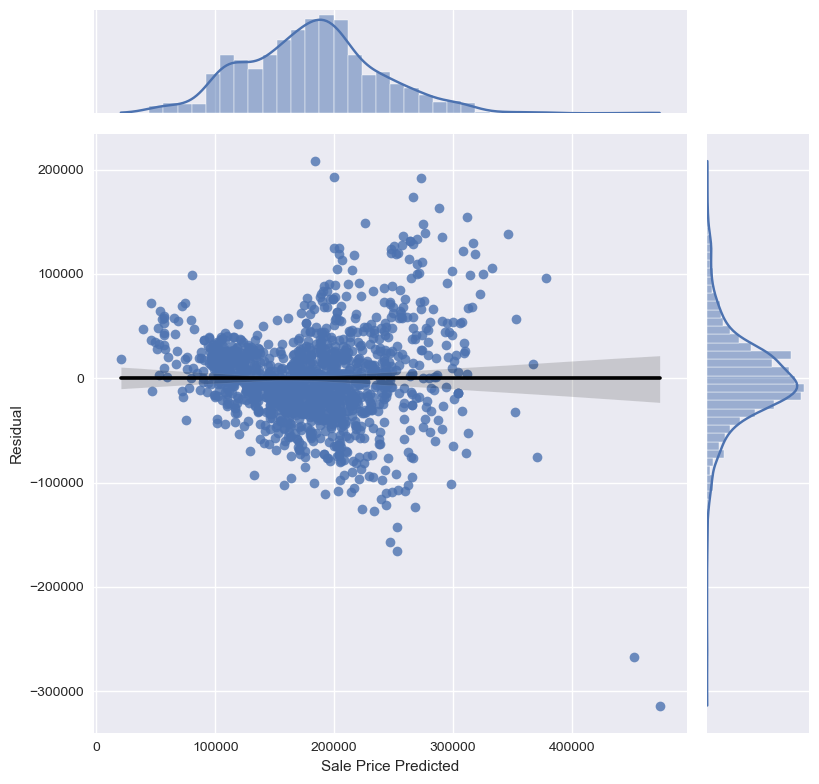

In [624]:
sns.jointplot(x='Sale Price Predicted',y='Residual' ,kind = "reg", data = df_reg2, ratio=5, height = 8, 
              line_kws={'color': 'black'})

In [ ]:
# Creating a jointpplot for predicated sales price and the residual 

### Section 6e Create a Residaul Plot (residplot) based on Kitchen Quality

In [627]:
df_reg2 = df_realestate[['Living Area Above Grade','Sale Price','Garage Cars','Kitchen Qual']]
df_reg2.reset_index()
df_reg2 = pd.concat([df_reg2,pred2,resid2], axis=1)
df_reg2.head(10)
df_reg2=df_reg2.rename(columns={0:'Sale Price Predicted', \
                              1:'Residual'})
df_reg2.head(10)

,Living Area Above Grade,Sale Price,Garage Cars,Kitchen Qual,Sale Price Predicted,Residual
Id,,,,,,
1,1710,208500,2,Good,203768.988587,4731.011413
2,1262,181500,2,Average,173008.762367,8491.237633
3,1786,223500,2,Good,208987.241249,14512.758751
4,1717,140000,3,Good,248612.021697,-108612.021697
5,2198,250000,3,Good,281638.068152,-31638.068152
6,1362,143000,2,Average,179874.884291,-36874.884291
7,1694,307000,2,Good,202670.409079,104329.590921
8,2090,200000,2,Average,229860.251899,-29860.251899
9,1774,129900,2,Average,208163.306619,-78263.306619


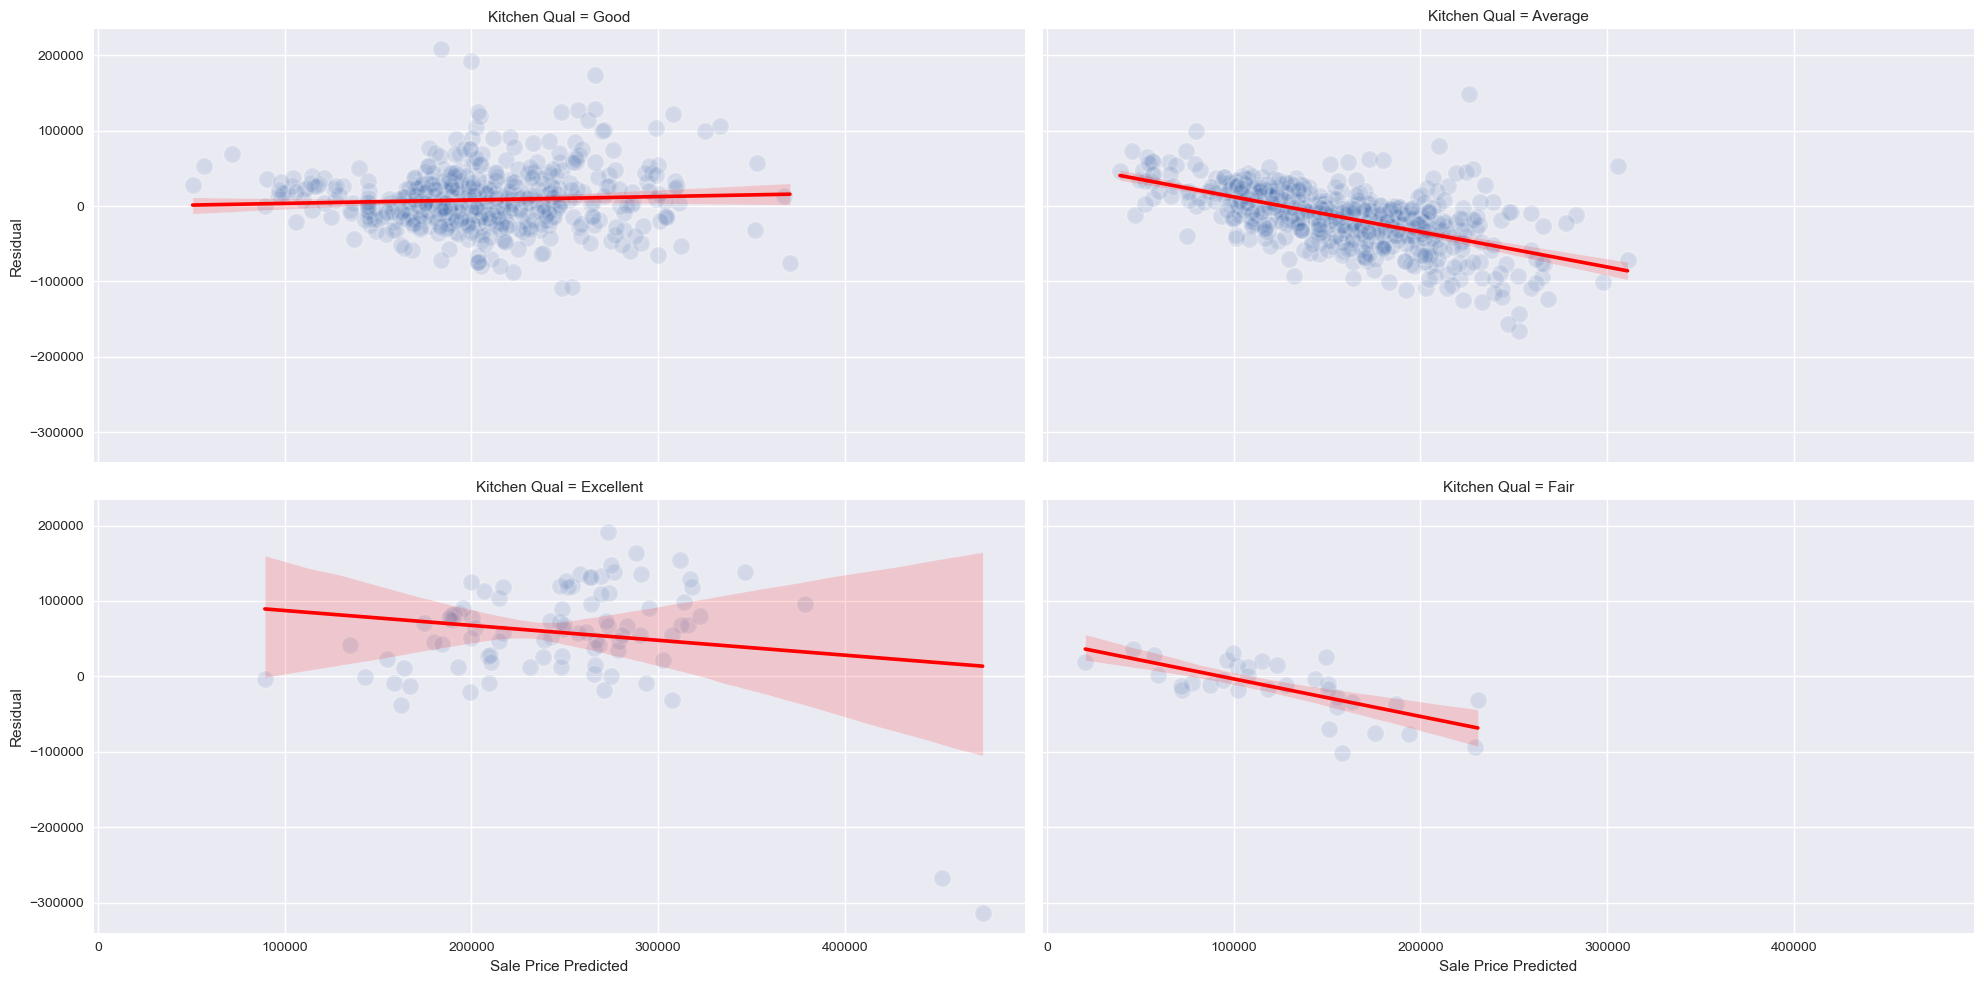

In [628]:
sns.lmplot(x='Sale Price Predicted', y='Residual', col ='Kitchen Qual', col_wrap=2, data=df_reg2, palette='Set1' ,aspect=2, scatter_kws={"alpha":0.15,"s":150,"linewidths":2,"edgecolor":"white"}
,line_kws={'color':'red'},)

In [ ]:
# Adding kitchen qual into the mix and using it to create a lmplot

### Section 6f Explanation of Multiple Regression Results

In [630]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          5.79e-292
Time:                        23:18:57   Log-Likelihood:                -16837.
No. Observations:                1390   AIC:                         3.368e+04
Df Residuals:                    1387   BIC:                         3.370e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2366.5055   4067.359     -0.582      0.561   -1.03e+04    5612.334
Living Area Above Grade    68.6612      2.638     26.029      0.000      63.487      73.836
Garage Cars              4.436e+04   1857.324     23.885      0.000    4.07e+04     4.8e+04
==============================================================================
Omnibus:                      151.685   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1229.044
Skew:                           0.084   Prob(JB):                    1.31e-267
Kurtosis:                       7.604   Cond. No.                     5.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The relationship between Living area above grade & Garage cars to the target variable is that when the area of the house and the amount of
garage cars increase the Sale Price will increase. 

The measure that indicate that will happen is the R-squares result saying 62% of the time. 

The plots tell us there is a positive linear correlation with living area and garage size to sales price.

When looking at the adj R-squared statistic it looks like it was a significant increase adding on the garage size, almost a 20% increase.

In real terms this would mean that if a home has more living area and more space for a garage the sales price will increase. The Target Variable is affected by the two features.

In [ ]:
# Explanation of the mutliple regresion results

## Section 7 Create your own multiple regression

### Section 7a Create Multiple Regression

In [638]:
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Alley,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,NaN,Level,College Creek,Normal,7,5,2003,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,NaN,Level,Veenker,Adjacent Feeder St,6,8,1976,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500
3,2-STORY 1946 & NEWER,68.0,11250,NaN,Level,College Creek,Normal,7,5,2001,...,Rough Finished,2,0,42,0,0,0,0,Normal Sale,223500
4,2-STORY 1945 & OLDER,60.0,9550,NaN,Level,Crawford,Normal,7,5,1915,...,Unfinished,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000
5,2-STORY 1946 & NEWER,84.0,14260,NaN,Level,Northridge,Normal,8,5,2000,...,Rough Finished,3,192,84,0,0,0,0,Normal Sale,250000


In [640]:
X=df_realestate[['Lot Area','Pool Area']]
y=df_realestate['Sale Price']
X=sm.add_constant(X)

reg3= sm.OLS(y, X).fit()

pred3=reg3.predict(X)

resid3=reg3.resid
                 
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     44.07
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           2.78e-19
Time:                        23:18:57   Log-Likelihood:                -17466.
No. Observations:                1390   AIC:                         3.494e+04
Df Residuals:                    1387   BIC:                         3.495e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.628e+05   2697.747     60.364      0.000    1.58e+05    1.68e+05
Lot Area       1.7293      0.186      9.315      0.000       1.365       2.093
Pool Area     20.9706     48.632      0.431      0.666     -74.429     116.371
==============================================================================
Omnibus:                      278.978   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.895
Skew:                           1.196   Prob(JB):                    3.17e-116
Kurtosis:                       4.861   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Creating the mulitple regresttion results

### Section 7b Create a Regression table for Mutliple Regression

In [643]:
df_reg3 = df_realestate[['Lot Area','Sale Price','Pool Area']]
df_reg3.reset_index()
df_reg3 = pd.concat([df_reg3,pred3,resid3], axis=1)
df_reg3.head(10)
df_reg3=df_reg3.rename(columns={0:'Sale Price Predicted', \
                              1:'Residual'})
df_reg3.head(10)

,Lot Area,Sale Price,Pool Area,Sale Price Predicted,Residual
Id,,,,,
1,8450,208500,0,177460.411375,31039.588625
2,9600,181500,0,179449.078015,2050.921985
3,11250,223500,0,182302.382324,41197.617676
4,9550,140000,0,179362.614248,-39362.614248
5,14260,250000,0,187507.501095,62492.498905
6,14115,143000,0,187256.756171,-44256.756171
7,10084,307000,0,180286.047279,126713.952721
8,10382,200000,0,180801.371330,19198.628670
9,6120,129900,0,173431.199835,-43531.199835


In [ ]:
# Creating the mulitple regrestion table

### Section 7c Create any Plot of your choosing

Text(0, 0.5, 'Sale Price')

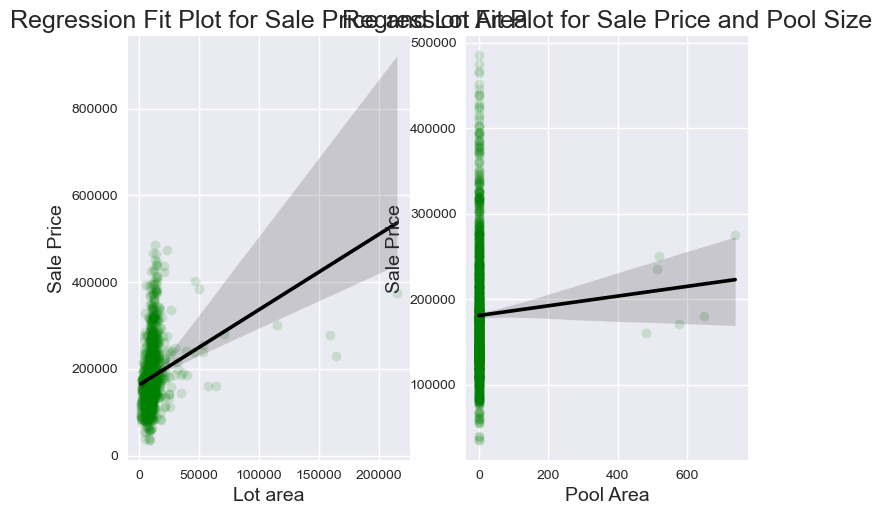

In [658]:
plt.subplot(121)

sns.regplot(x='Lot Area', y= 'Sale Price', data = df_reg3, scatter_kws={'color':'green','alpha':0.15, 's':50},
            line_kws={'color':'black'})

plt.title('Regression Fit Plot for Sale Price and Lot Area',fontsize ='18',multialignment='center')
plt.xlabel('Lot area',fontsize='14',multialignment='center')
plt.ylabel('Sale Price', fontsize='14',multialignment='center')
plt.subplot(122)
sns.regplot(x='Pool Area', y= 'Sale Price', data = df_reg3, scatter_kws={'color':'green','alpha':0.15, 's':50},
            line_kws={'color':'black'})

plt.title('Regression Fit Plot for Sale Price and Pool Size',fontsize ='18',multialignment='center')
plt.xlabel('Pool Area',fontsize='14',multialignment='center')
plt.ylabel('Sale Price', fontsize='14',multialignment='center')

In [ ]:
# Creating the mulitple two reg plots to describe the relationship

### Section 7d Explanation your Multiple Regression Results

In [660]:
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     44.07
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           2.78e-19
Time:                        23:22:31   Log-Likelihood:                -17466.
No. Observations:                1390   AIC:                         3.494e+04
Df Residuals:                    1387   BIC:                         3.495e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.628e+05   2697.747     60.364      0.000    1.58e+05    1.68e+05
Lot Area       1.7293      0.186      9.315      0.000       1.365       2.093
Pool Area     20.9706     48.632      0.431      0.666     -74.429     116.371
==============================================================================
Omnibus:                      278.978   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.895
Skew:                           1.196   Prob(JB):                    3.17e-116
Kurtosis:                       4.861   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I chose these features as I saw pool area had 0s as there are homes without pools and was curious on the change it would add. We also looked at the area of the house,but not the whole lot, so I was curious as well to see how they would both change the cost.

It doesn't look there is a relationship, as the R statistic is extremely low as well as the F statistic being low as well.The AIC is very high letting me know this isn't a good model at all.

The plots let me see that there are very few pools, and that there is no relationship; however lot area to sale price, it shows there is a better looking relatiponship there compared to pool area.

The practical implications would be that there are better variables that can be used to determine the tager varaiable then the ones I chose. 

In [ ]:
# Explaining the results (Definitely need to work on this for the future)